In [1]:
!pip install tensorflow-gpu==2.0.0-rc1

     |████████████████████████████████| 380.5MB 66kB/s 
     |████████████████████████████████| 4.3MB 28.5MB/s 
     |████████████████████████████████| 501kB 45.4MB/s 


In [2]:
#檢查tf版本
import tensorflow as tf
tf.__version__

'2.0.0-rc1'

In [3]:
tf.test.is_gpu_available()

False

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
x_train.shape, x_train.dtype

((60000, 28, 28), dtype('uint8'))

In [6]:
y_train.shape, y_train.dtype

((60000,), dtype('uint8'))

In [0]:
#將y_train的data轉成向量
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [8]:
y_train.shape, y_train.dtype

((60000, 10), dtype('float32'))

In [9]:
from PIL import Image
Image.fromarray(x_train[0])

In [0]:
#將資料正規化
#把資料縮放到-1~1之間
x_train = (x_train-127.5)/127.5
x_test = (x_test-127.5)/127.5


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')    
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
#optimizer = tf.keras.optimizers.SGD(learning_rate=1e-1)
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.4557 - accuracy: 0.8671 - val_loss: 0.2868 - val_accuracy: 0.9189
Epoch 2/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2762 - accuracy: 0.9200 - val_loss: 0.2380 - val_accuracy: 0.9345
Epoch 3/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2286 - accuracy: 0.9341 - val_loss: 0.2014 - val_accuracy: 0.9434
Epoch 4/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1960 - accuracy: 0.9434 - val_loss: 0.1797 - val_accuracy: 0.9466
Epoch 5/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1729 - accuracy: 0.9505 - val_loss: 0.1638 - val_accuracy: 0.9510
Epoch 6/10
60000/60000 [==============================] - 5s 92us/sample - loss: 0.1543 - accuracy: 0.9554 - val_loss: 0.1454 - val_accuracy: 0.9573
Epoch 7/10
60000/60000 [==============================]

In [0]:
model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.12156951235979796, 0.9633]

In [0]:
model.predict_classes(x_test)

array([7, 2, 1, ..., 4, 5, 6])

## Use other optimizers



In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')    
])
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

In [0]:
model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.09543165986898239, 0.9747]

## Use MSE as loss

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')    
])
model.compile(optimizer="adam", loss='mse', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0163 - accuracy: 0.8891 - val_loss: 0.0110 - val_accuracy: 0.9257
Epoch 2/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0087 - accuracy: 0.9432 - val_loss: 0.0081 - val_accuracy: 0.9467
Epoch 3/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0069 - accuracy: 0.9550 - val_loss: 0.0071 - val_accuracy: 0.9523
Epoch 4/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0060 - accuracy: 0.9604 - val_loss: 0.0058 - val_accuracy: 0.9621
Epoch 5/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.0054 - accuracy: 0.9649 - val_loss: 0.0052 - val_accuracy: 0.9664
Epoch 6/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0049 - accuracy: 0.9687 - val_loss: 0.0057 - val_accuracy: 0.9636
Epoch 7/10
60000/60000 [==========================

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')    
])
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-4)
model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0159 - accuracy: 0.8929 - val_loss: 0.0101 - val_accuracy: 0.9323
Epoch 2/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0089 - accuracy: 0.9424 - val_loss: 0.0086 - val_accuracy: 0.9404
Epoch 3/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.0069 - accuracy: 0.9558 - val_loss: 0.0059 - val_accuracy: 0.9608
Epoch 4/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0058 - accuracy: 0.9622 - val_loss: 0.0060 - val_accuracy: 0.9613
Epoch 5/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0050 - accuracy: 0.9680 - val_loss: 0.0053 - val_accuracy: 0.9643
Epoch 6/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0045 - accuracy: 0.9722 - val_loss: 0.0051 - val_accuracy: 0.9673
Epoch 7/10
60000/60000 [==========================

## utils.plot_model


tf.keras.utils.plot_model( <br />
    model,<br />
    to_file='model.png',<br />
    show_shapes=False,<br />
    show_layer_names=True,<br />
    rankdir='TB',<br />
    expand_nested=False,<br />
    dpi=96<br />
)

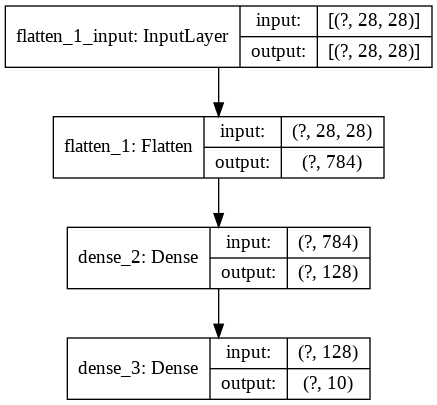

In [0]:
tf.keras.utils.plot_model(model,show_shapes=True,)

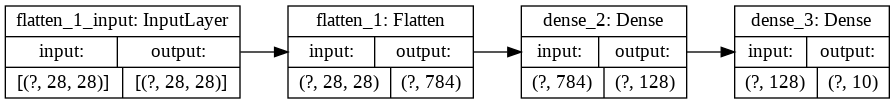

In [0]:
tf.keras.utils.plot_model(model,show_shapes=True,rankdir='LR')

## 另一個方法：
-> 簡略語法


In [0]:
from tensorflow.keras.layers import layers
model = tf.keras.models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')    
])
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-4)
model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test)

In [0]:
model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.005583296257588162, 0.965]

# 練習 Cifar10

圖片大小 --> 32 x 32 x 3<br />
參考 ： https://www.itread01.com/content/1543716189.html

Load data

In [15]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [16]:
#將y_train的data轉成向量
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

y_train.shape

(50000, 10)

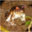

In [17]:
from PIL import Image
Image.fromarray(x_train[0])

In [0]:
#將資料正規化
#把資料縮放到-1~1之間
x_train = (x_train-127.5)/127.5
x_test = (x_test-127.5)/127.5

In [19]:
import tensorflow as tf
tf.__version__

'2.0.0-rc1'

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')    
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________


In [0]:
#optimizer = tf.keras.optimizers.SGD(learning_rate=1e-1)
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(x_train,y_train, epochs=10 , validation_data=(x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 27s 547us/sample - loss: 1.6979 - accuracy: 0.4035 - val_loss: 1.5348 - val_accuracy: 0.4602
Epoch 2/10
50000/50000 [==============================] - 26s 526us/sample - loss: 1.4883 - accuracy: 0.4743 - val_loss: 1.4919 - val_accuracy: 0.4769
Epoch 3/10
50000/50000 [==============================] - 26s 510us/sample - loss: 1.3926 - accuracy: 0.5082 - val_loss: 1.4337 - val_accuracy: 0.4986
Epoch 4/10
50000/50000 [==============================] - 26s 524us/sample - loss: 1.3193 - accuracy: 0.5356 - val_loss: 1.4441 - val_accuracy: 0.4964
Epoch 5/10
50000/50000 [==============================] - 26s 524us/sample - loss: 1.2427 - accuracy: 0.5609 - val_loss: 1.4529 - val_accuracy: 0.5039
Epoch 6/10
50000/50000 [==============================] - 26s 529us/sample - loss: 1.1786 - accuracy: 0.5826 - val_loss: 1.4268 - val_accuracy: 0.5090
Epoch 7/10
50000/50000 [====================

In [0]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 107us/sample - loss: 1.5310 - acc: 0.5232


[1.5309986993789673, 0.5232]